# Data Science for Manufacturing - Workshop 5-1

## Objectives

- Introduction to database manipulation using Python, Pandas and SQL 
- Understanding of relational databases

# Introduction

In this tutorial we will use pymssql - this is a simple database interface for Python that builds on top of FreeTDS to provide a Python DB-API (PEP-249) interface to Microsoft SQL Server. 

Here's the documentation: https://pypi.org/project/pymssql/

To get started, simply install and then import the module:

In [1]:
!pip install pymssql

  Using cached pymssql-2.2.5-cp39-cp39-manylinux_2_24_x86_64.whl (2.6 MB)


In [2]:
import pymssql
import pandas as pd

## Practical exercise with Pandas and SQL

We have hosted a MSSQL Server on Azure at dsim.database.windows.net. The server has a database called 'AdventureWorks2016', an example database for a fictious cycle manufacturing company, Adventure Works, see https://docs.microsoft.com/en-us/previous-versions/sql/sql-server-2008/ms124825(v=sql.100)?redirectedfrom=MSDN .

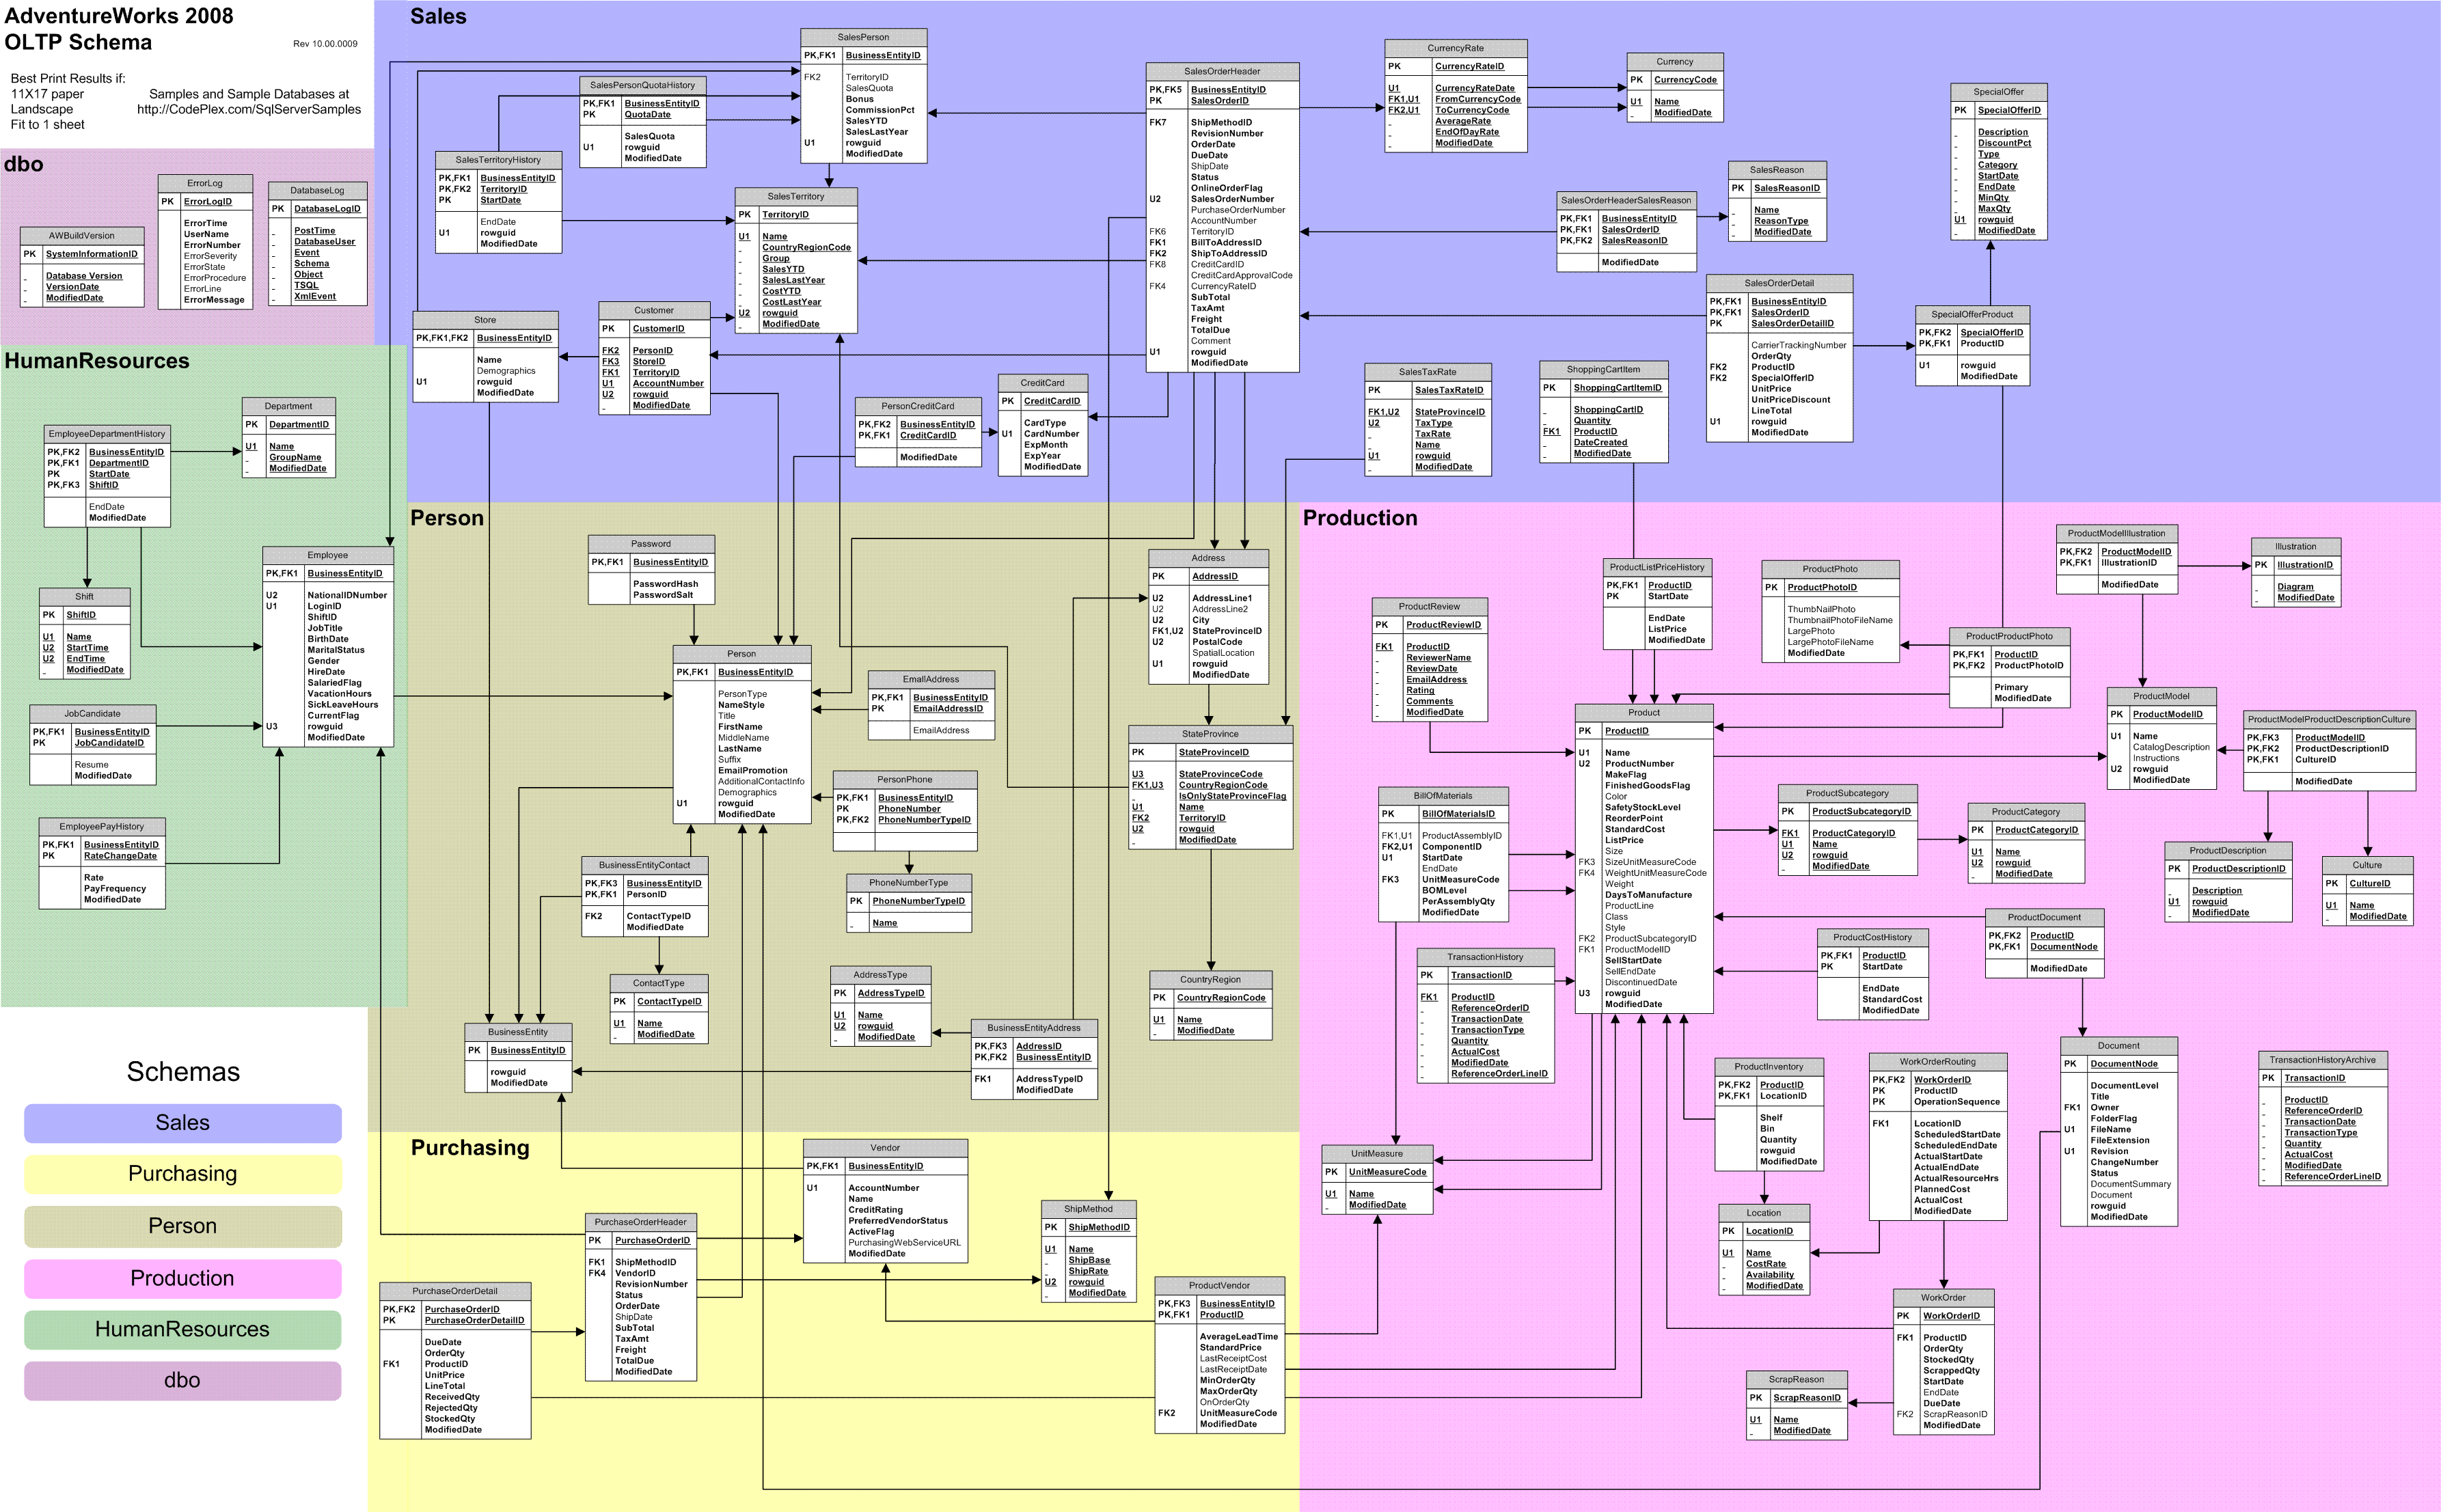

The above diagram shows the schema for the AdventureWorks2016 database. (You might want to download the image so you can easily zoom in).

### Step 1: Connect

The pymssql.connect function is used to connect to SQL Database.

In [3]:
conn = pymssql.connect(server='dsim.database.windows.net', user='dsim_user', password='H1Uj&T$gm4^W', database='AdventureWorks2016')

### Step 2: Execute query

The `pd.read_sql` method is used to execute an SQL query and load result into a DataFrame.

Here is the documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html


Some of The Most Important SQL Commands

    SELECT - extracts data from a database
    UPDATE - updates data in a database
    DELETE - deletes data from a database
    INSERT INTO - inserts new data into a database
    CREATE DATABASE - creates a new database
    ALTER DATABASE - modifies a database
    CREATE TABLE - creates a new table
    ALTER TABLE - modifies a table
    DROP TABLE - deletes a table
    CREATE INDEX - creates an index (search key)
    DROP INDEX - deletes an index
 

Let's run a query to find out what tables are in the database

In [4]:
df_tables = pd.read_sql("SELECT * FROM information_schema.tables;", conn)
df_tables.head(100)

/opt/conda/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,AdventureWorks2016,Person,AddressType,BASE TABLE
1,AdventureWorks2016,Person,BusinessEntity,BASE TABLE
2,AdventureWorks2016,Person,BusinessEntityAddress,BASE TABLE
3,AdventureWorks2016,Person,BusinessEntityContact,BASE TABLE
4,AdventureWorks2016,Person,ContactType,BASE TABLE
...,...,...,...,...
87,AdventureWorks2016,HumanResources,EmployeeDepartmentHistory,BASE TABLE
88,AdventureWorks2016,HumanResources,EmployeePayHistory,BASE TABLE
89,AdventureWorks2016,HumanResources,JobCandidate,BASE TABLE
90,AdventureWorks2016,HumanResources,Shift,BASE TABLE


Let's run a query to get the Product table (I can see such a table exists from the schema diagram above)

In [5]:
df_product = pd.read_sql("SELECT * FROM Production.Product;", conn)
df_product

/opt/conda/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
0,1,Adjustable Race,AR-5381,False,False,None,1000,750,0.0000,0.00,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,694215b7-08f7-4c0d-acb1-d734ba44c0c8,2014-02-08 10:01:36.827
1,2,Bearing Ball,BA-8327,False,False,None,1000,750,0.0000,0.00,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,58ae3c20-4f3a-4749-a7d4-d568806cc537,2014-02-08 10:01:36.827
2,3,BB Ball Bearing,BE-2349,True,False,None,800,600,0.0000,0.00,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,9c21aed2-5bfa-4f18-bcb8-f11638dc2e4e,2014-02-08 10:01:36.827
3,4,Headset Ball Bearings,BE-2908,False,False,None,800,600,0.0000,0.00,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,ecfed6cb-51ff-49b5-b06c-7d8ac834db8b,2014-02-08 10:01:36.827
4,316,Blade,BL-2036,True,False,None,800,600,0.0000,0.00,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,e73e9750-603b-4131-89f5-3dd15ed5ff80,2014-02-08 10:01:36.827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,995,ML Bottom Bracket,BB-8107,True,True,None,500,375,44.9506,101.24,...,None,M,None,5.0,96.0,2013-05-30,NaT,None,71ab847f-d091-42d6-b735-7b0c2d82fc84,2014-02-08 10:01:36.827
500,996,HL Bottom Bracket,BB-9108,True,True,None,500,375,53.9416,121.49,...,None,H,None,5.0,97.0,2013-05-30,NaT,None,230c47c5-08b2-4ce3-b706-69c0bdd62965,2014-02-08 10:01:36.827
501,997,"Road-750 Black, 44",BK-R19B-44,True,True,Black,100,75,343.6496,539.99,...,R,L,U,2.0,31.0,2013-05-30,NaT,None,44ce4802-409f-43ab-9b27-ca53421805be,2014-02-08 10:01:36.827
502,998,"Road-750 Black, 48",BK-R19B-48,True,True,Black,100,75,343.6496,539.99,...,R,L,U,2.0,31.0,2013-05-30,NaT,None,3de9a212-1d49-40b6-b10a-f564d981dbde,2014-02-08 10:01:36.827


Let's run a query to get the ProductInventory table

In [ ]:
df_inv = pd.read_sql("SELECT * FROM Production.ProductInventory;", conn)
df_inv

In [ ]:
df_addresses = pd.read_sql("SELECT * FROM Person.Address;", conn)
df_addresses

You can use SELECT to extract data from a database. In SQL, selection is done using a comma-separated list of columns you’d like to select (or a `*` to select all columns). 

More on comparison with SQL in pandas here: https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html

More on SQL SELECT here: https://www.w3schools.com/sql/sql_select.asp

If you want to extract specific parts of the database such as certain rows or columns, you need to use constraints. 
    
Most `SELECT` queries have a `WHERE` clause, that defines the rows that you want. This means that a general `SELECT` looks like this:
    
`SELECT <cols> FROM <tablename> WHERE <constraints>`

Constraints can take many forms,common constraints are:
* `=` for equality (e.g. age = 45). Works with strings, but they need to be in quotes, e.g. `name = 'Jemima'`
* `>` or `<` for numbers
* `LIKE` does partial string matching, with `%` standing in for "anything", so `city LIKE 'Lon%'` would match London, Long Beach and Longjing
* `NOT` selects all the rows where the condition does not match
* `AND`, OR can be used to combine conditions

In [ ]:
df_product = pd.read_sql("SELECT * FROM Production.Product WHERE Weight>300;", conn)
df_product

In [ ]:
df_addresses = pd.read_sql("SELECT City, PostalCode FROM Person.Address;", conn)
df_addresses

In [ ]:
df_addresses = pd.read_sql("SELECT * FROM Person.Address WHERE City='Seattle'", conn)
df_addresses

### Exercise

In [ ]:
# Get all of the Purchasing Vendors

In [ ]:
# Get all of the addresses that do *NOT* include Berlin

In [ ]:
# Get all of the customers whose name starts with "J"

In [ ]:
# Get all of the products that weigth 500 *AND* are black. Do the same with OR

### Step 3: Joins

We have two options for joining tables using Pandas or by using SQL.

Personally, I prefer to bring all the tables I need into dataframes and use Pandas joins. I think this is more flexible; I can see all the data and decide what to do with it (I also can never remember SQL syntax!).

However, there may be times when the tables are very large and I only want to retrieve the data relevant after the join is executed. In this case it's better to use SQL to join as this is performed in the database itself and only the data returned by the query needs to transfered.

#### Pandas to JOIN

In [ ]:
df_product_inv = df_inv.join(df_product, on='ProductID', how='left', lsuffix='_inv', rsuffix='_product')
df_product_inv

#### SQL to JOIN

In [ ]:
df_product_inv = pd.read_sql("SELECT * \
                              FROM Production.Product \
                              LEFT JOIN Production.ProductInventory \
                              ON Production.Product.ProductID = Production.ProductInventory.ProductID;", conn)
df_product_inv

#### Difficult Exercises

In [ ]:
# Show all the email addresses for each Person (either join in Pandas or SQL) - remember look at the schema diagram for hints

In [ ]:
# Show all the sales orders made in France  (either join in Pandas or SQL) - remember look at the schema diagram for hints

#### Very Difficult Exercise ;-)

In [ ]:
### calculate total value of all scrapped products - remember look at the schema diagram for hints